This notebook focusses on the Inverse Translation Approximation Method (ITAM). The inverse translation of a lognormal process i.e. identifying the underlying gaussian stochastic proccess is carried out. Firstly, the sample generation code and translation is presented, details of which can be found in 'Translation.ipynb'.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

T = 100  # Total time
nt = 256  # Num of Discretized Time
dt = T / nt

F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.
dw = F / nw
t_u = 2*np.pi/2/F
if dt>t_u:
    print('Error (aliasing)')

# Generation of Input Data(Stationary)
t = np.linspace(0, T - dt, nt)
w = np.linspace(0, F - dw, nw)

# Compute the power spectral density S(w) at various points frequencies w
S = 130 / 4 * w ** 2 * np.exp(-5 * w)
nsamples = 1000

from UQpy.StochasticProcess import SRM
SRM_object = SRM(nsamples=nsamples, power_spectrum=S, time_duration=[dt], frequency_length=[dw],
                 number_time_intervals=[nt], number_frequency_intervals=[nw], case='uni')
samples = SRM_object.samples

from UQpy.Distributions import Lognormal

dist_object = Lognormal(0.5, 0, np.exp(0.5))

from UQpy.StochasticProcess import Translation

Translate_object = Translation(dist_object=dist_object, time_duration=dt, frequency_interval=dw,
                               number_time_intervals=nt, number_frequency_intervals=nw, power_spectrum_gaussian=S,
                               samples_gaussian=samples)
samples_ng = Translate_object.samples_non_gaussian
samples_ng = samples_ng - np.mean(samples_ng)
R_ng = Translate_object.correlation_function_non_gaussian
S_ng = Translate_object.power_spectrum_non_gaussian
r_ng = Translate_object.scaled_correlation_function_non_gaussian

# samples_ng = samples_ng.reshape([1000, 1, 256])

Next, we identify the gaussian corelation function which upon translation yields the lognormal corelation

In [2]:
from UQpy.StochasticProcess import InverseTranslation

Inverse_translate_object = InverseTranslation(dist_object=dist_object, time_duration=dt, frequency_interval=dw,
                                              number_time_intervals=nt, number_frequency_intervals=nw,
                                              correlation_function_non_gaussian=R_ng, samples_non_gaussian=samples_ng)
R_g_inv = Inverse_translate_object.correlation_function_gaussian
S_g_inv = Inverse_translate_object.power_spectrum_gaussian

4.491445578843358
1.484818810391029
0.802689241623271
0.5380983772599817
0.3985042948644951
0.3121537875278269
0.2534148323684996
0.21081558093426891
0.17846866136445433
0.15305825934171796
0.1325798820919428
0.11574940031130192
0.10170302682692628
0.08983539292598686
0.07970749041793765
0.07099182452767346
0.06343830650358799
0.05685220335672715
0.05107938028720277
0.0459961198073393
0.04150191162985742
0.037514230149288334
0.03396467769231331
0.03079608836841985
0.027960321342287472
0.025416557676427694
0.023129970673870723
0.02107067702545691
0.019212901627033686
0.017534306754622035
0.016015448925729307
0.014639335850552552
0.013391062511005131
0.012257510280196317
0.011227096636430888
0.010289565763133808
0.009435812400127813
0.008657732911291823
0.007948098748840837
0.0073004484579332965
0.00670899510646421
0.0061685466118886955
0.005674436903134408
0.005222466229793168
0.0048088492212209595
0.0044301695425790905
0.004083340189534133
0.003765568615717477
0.0034743260216513576
0.0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


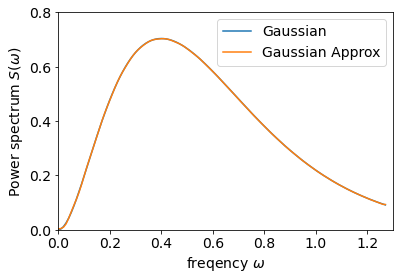

In [6]:
plt.rcParams.update({'font.size': 14})

fig7 = plt.figure()
# plt.plot(w, S_ng, label='non_Gaussian')
plt.plot(w, S, label='Gaussian')
plt.plot(w, S_g_inv, label='Gaussian Approx')
plt.xlabel('freqency $\omega$')
plt.ylabel('Power spectrum $S(\omega)$')
plt.xlim(0, 1.3)
plt.ylim(0, 0.8)
plt.legend(loc='upper right')
plt.savefig('power_spectrum_inverse_translation.eps')
plt.show()